In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import zlib

In [2]:
def _checksum_dataset(row):
    row_str = str(row).encode('utf-8')
    hashed =  zlib.adler32(row_str)
    return np.array(hashed)

In [3]:
def _hash_dataset(data, target):
    y = data[target] # tar
    x = data.drop(columns=[target])
    x_values = np.apply_along_axis(_checksum_dataset, axis=1, arr=x) # apply hashing function on  the rows

    # scale the hashed values between 0 (min) and 1 (max)
    min_ = x_values.min()
    max_ = x_values.max()
    x_norm = (x_values - min_) / (max_ - min_)
    return x_norm, y.to_list()

In [4]:
def plot_linear(data, target):
    x, y = _hash_dataset(data, target) # obtain the x and y values
    x_min, x_max = x.min(), x.max()
    fig, ax = plt.subplots()
    ax.set_xlim(x_min, x_max)
    ax.set_box_aspect(1)
    ax.set_xlabel("Hashed feature values")
    ax.set_ylabel(f'{target}')
    ax.set_title(f"Rough estimate of the distribution of {target} with features")
    ax.plot(x, y, 'ob')

    plt.show()
    

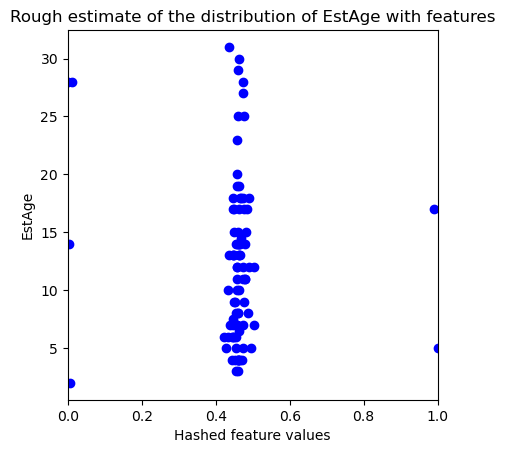

In [5]:
cpicta_dataset_path = "../data/cpicta_quantseq_with_estimated_ages_dataset.csv"
df = pd.read_csv(cpicta_dataset_path, index_col=0)
plot_linear(df, "EstAge")

In [6]:
from plot_util import plot_reg
plot_reg(X_test, y_test, y)

NameError: name 'X_test' is not defined